# Homework Tutorial #2:  "Data Querying and Visualization"

This tutorial provides some practice with interfacing with the SDSS database, and retrieving and visualizing data.

## Getting Started

1. Load this notebook into your SciServer account to edit and run it.

2. Remember to click the "play" button (alternatively, "Shift+Return") through each code block as you go.

## I. Visualizing Data

The standard Python library for plotting and visualization is called "Matplotlib".  Below are a few examples showing what it can do.  An excellent tutorial can be found here: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

Here's a [list of matplotlib codes for different plot colors](https://matplotlib.org/2.0.2/api/colors_api.html).


And here's a full [list of different shapes](https://matplotlib.org/api/markers_api.html) you can use as markers in scatter plots.



In [1]:
# First, we'll need to import the matplotlib library and some of its modules

import matplotlib
%config InlineBackend.rc = {}
from matplotlib import pylab as plt
%matplotlib inline

# If everything imports without a problem, the next line should print...
print('OK')

OK


----------------
In the cell below we'll make an example of a scatter plot.
(For more information, see [here](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html).)

This code is written to generate and plot new random data every time you run it. You might notice how it changes each time you play it.

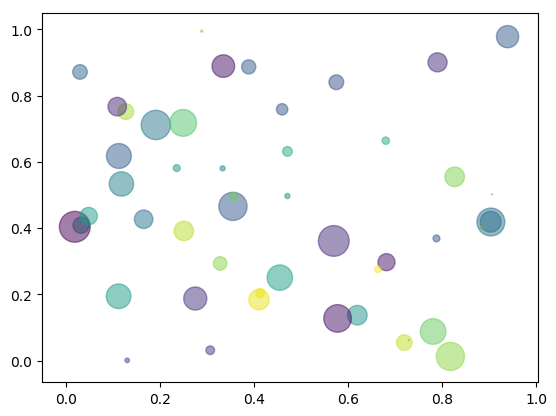

In [2]:
# We'll need to import the numerical Python (Numpy) library if we want to generate random data
import numpy as np

# Here we'll use a function in the Numpy library to generate some random numbers between zero and one, in arrays 50 elements long...
N = 50
x = np.random.rand(N)
y = np.random.rand(N)

# We can also generate an array of numbers (the same length as the others) to represent random colors for our points
colors = np.random.rand(N)

# We can generate another array of the same length that makes circles of various random sizes
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

# Here we'll make our scatter plot of x vs. y, with circles described by those random colors and sizes
# The 'alpha' keyword is used to make the markers semi-transparent. 0 = totally transparent; 1 = fully opaque
#
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

# display the plot to the screen
plt.show()

In the case where you have two samples of data that you want to show on the same plot, you can also do that easily with the plt.scatter() function.  To help make it understandable, you'll want to add a labels and a legend.  An example of how to do that is shown below.

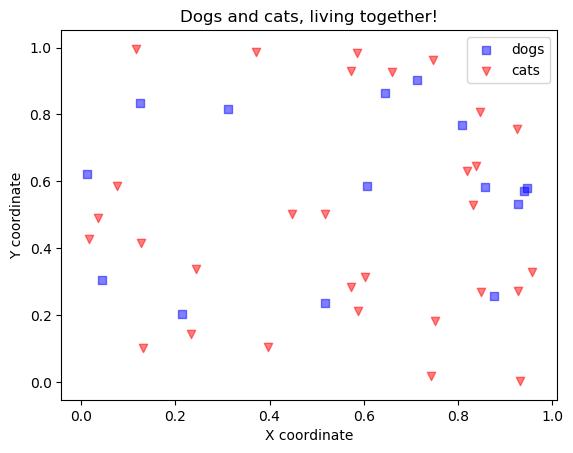

In [3]:
# We don't need to import the numpy library again, since we already did it once in this notebook.

# Let's make two samples of simulated data, which represent the locations of dogs and cats in a neighborhood

# Here are the locations of 15 dogs 
N_dogs = 15
x_dogs = np.random.rand(N_dogs)
y_dogs = np.random.rand(N_dogs)

# Here are the locations of 30 cats
N_cats=30
x_cats = np.random.rand(N_cats)
y_cats = np.random.rand(N_cats)

# Let's plot their locations in the same figure
plt.scatter(x_dogs, y_dogs, marker='s', color='b', alpha=0.5, label='dogs')
plt.scatter(x_cats, y_cats, marker='v', color='r', alpha=0.5, label='cats')

# label the axes
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

# add a legend and a title
plt.title('Dogs and cats, living together!')
plt.legend()

# display it
plt.show()

If you wanted to compare the distribution of cats and dogs along the x-axis, a histogram is probably the easiest way to do that...

(More documentation on histograms can be found [here](http://matplotlib.org/examples/frontpage/plot_histogram.html).)

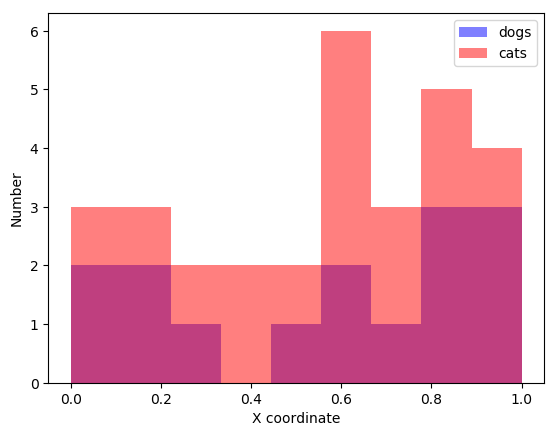

In [4]:
# let's make the histogram have 10 equally spaced bins, spanning the range of 0-1:
bins=np.linspace(0,1,10)
plt.hist(x_dogs, bins=bins, color='b', alpha=0.5, label='dogs')
plt.hist(x_cats, bins=bins, color='r', alpha=0.5, label='cats')

plt.xlabel('X coordinate')
plt.ylabel('Number')
plt.legend()
plt.show()

If the overlap in the samples is too confusing, you can change the format of the histogram ("histtype") so that it's not filled in.  Different line styles ("ls") will make sure the plot is readable even if it's printed in black and white.

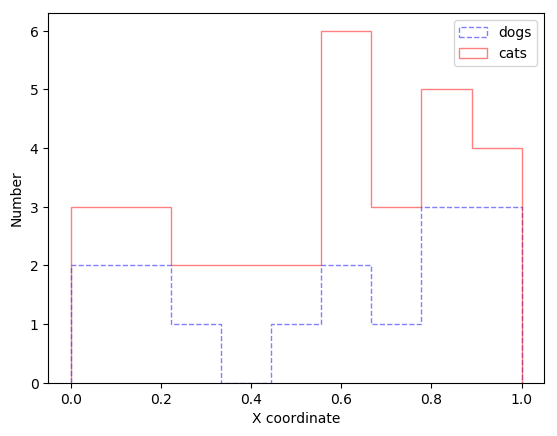

In [5]:
# let's make the histogram have 10 equally spaced bins, spanning the range of 0-1:
bins=np.linspace(0,1,10)
plt.hist(x_dogs, bins=bins, color='b', histtype='step', ls='dashed', alpha=0.5, label='dogs')
plt.hist(x_cats, bins=bins, color='r', histtype='step', ls='solid', alpha=0.5, label='cats')

plt.xlabel('X coordinate')
plt.ylabel('Number')
plt.legend()
plt.show()

Normalizing the histograms (using the keyword: normed='True') makes it easier to compare the shapes of distributions even when one sample is much more numerous than the other.  This is calculated by dividing each bin by the total area of the histogram.

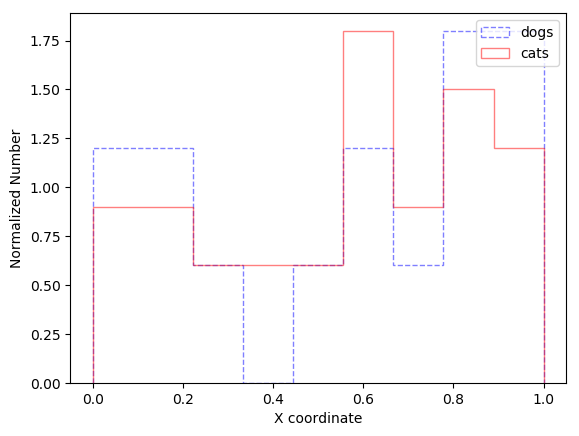

In [6]:
# let's make the histogram have 10 equally spaced bins, spanning the range of 0-1:
bins=np.linspace(0,1,10)
plt.hist(x_dogs, bins=bins, color='b', histtype='step', ls='dashed', density='True', alpha=0.5, label='dogs')
plt.hist(x_cats, bins=bins, color='r', histtype='step', ls='solid', density='True', alpha=0.5, label='cats')

plt.xlabel('X coordinate')
plt.ylabel('Normalized Number')
plt.legend()
plt.show()

#### YOUR TURN:  What happens if you change the style of the plot?

Try **dramatically** changing the formatting of one of the example plots from above in the code block below.  **Extra points for creativity and bling will be awarded!**

I have provided only a few examples of figures that can be made using Matplotlib.  You can find more [here](http://matplotlib.org/users/screenshots.html), and this [thumbnail gallery](http://matplotlib.org/1.2.1/gallery.html) is useful for finding example code for making just about any kind of plot or visualization you can think of. 

As an extra challenge for anyone who is already familiar with the basics of Python plotting and wants to get extra-creative:  

* Fans of [XKCD](http://xkcd.com/) can also XKCD-ify your plots with the code found [here](http://matplotlib.org/xkcd/gallery.html) :)

* You can also emulate old-timey plots from print journals, as shown [here](https://scipython.com/blog/old-style-matplotlib-charts/).



In [7]:
# your code here

------------------
## II. Importing SciServer and other important libraries

Now let's get our hands on some real astronomy data to plot.

The SciServer team has written a number of libraries, generally prefixed with "SciServer", that assist in various functions like connecting to and querying the SDSS database. As with all Python libraries, they must be actively imported before being used.

The next code block imports those, together with some standard Python libraries helpful for scientific analysis. The code block below applies some settings you may find helpful.



In [1]:
# Import Python libraries to work with SciServer (see http://www.sciserver.org/docs/sciscript-python/)

import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
import SciServer.SkyServer as SkyServer # show individual objects through SkyServer
import SciServer.SciDrive           # read/write to/from SciDrive, cloud-based storage for your work
import numpy as np                  # standard Python library for math operations
import pandas                       # package for structuring and visualizing data
import matplotlib.pyplot as plt     # package for graphing and visualization 
print('SciServer libraries imported')

SciServer libraries imported


In [9]:
# Apply some recommended settings to the imported libraries

# ensures columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
print('Settings applied')

Settings applied


If you don't receive any errors after running the blocks of code above, the libraries will be successfully loaded.  More information about the libraries, which may be useful for the unusually curious or expert user, can be found on the [SciServer Python documentation site](http://www.sciserver.org/docs/sciscript-python/).


## III. Querying the SDSS database
The next code block searches the SDSS Data Release 16 database with lightning speed, using the CasJobs REST API. 

A very helpful tutorial on how to use SQL to query the SDSS database can be found [here](http://cas.sdss.org/dr15/en/help/howto/search/searchhowtohome.aspx).  **Please take 15 minutes at this time to review the tutorial if SQL is new to you.**


A description of the SDSS database structure and the specific information available in different defined Tables and Views, can be found [here](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx).

A simple search below is written to return results from the first 16 galaxies with spectroscopic information in the SDSS "galaxy" table that meet some specific criteria.  

If you don't recognize the names for the data types listed in the "galaxy" table (e.g., "p.ra", "p.g"), you can look them up [here](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx#&&history=description+Galaxy+V).



In [10]:
# Find objects in the Sloan Digital Sky Survey's Data Release 16.
#
# Query the Sloan Digital Sky Servey's Data Release 16.
#
# This query finds "nice-looking galaxies": 
#   galaxies in the SDSS database that have a spectrum 
#   and have a size (petror90_r) larger than 10 arcsec.
#   We are also requiring that the galaxies have apparent
#   model magnitudes (u,g,r,i,z) in the u-band filter between 0 and 19.6
#   and in the g-band filter between 0 and 17
#
# The query is stored in an object called "query"
#   and then executed with a function in the CasJobs library
#
# The returned data is stored in a table called "gals"
#
query="""
SELECT TOP 16 p.objId,p.ra,p.dec,p.petror90_r, p.g, p.r
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 17  AND p.petror90_r > 10
"""
gals = CasJobs.executeQuery(query, "dr16")

# this line requires that the unique object name 'objId' is the first column in the returned data table "gals"
gals = gals.set_index('objId')
gals

,ra,dec,petror90_r,g,r
objId,,,,,
1237667781238456442,219.577525,17.609425,18.30117,15.18190,14.29627
1237654879665324133,219.578818,3.639681,10.83427,15.93781,15.30992
1237662264855625968,219.580353,9.291655,10.88518,16.84558,15.97781
1237661850943947119,219.585008,39.393224,14.90473,16.72122,16.38783
1237662264855625834,219.588623,9.227637,14.91277,15.31813,14.61456
1237665532251013352,219.592920,23.428761,14.47842,15.66112,14.86994
1237667781775327268,219.594953,18.111218,12.58201,15.60288,14.90701
1237665351318503492,219.591756,27.336304,17.26094,15.94505,15.18246
1237654879128453333,219.614435,3.274918,11.88382,16.46257,16.06645


Run the code below to display cutouts of the images of the galaxies we've chosen from the database.

Getting image 1 of 16...
Getting image 2 of 16...
Getting image 3 of 16...
Getting image 4 of 16...
Getting image 5 of 16...
Getting image 6 of 16...
Getting image 7 of 16...
Getting image 8 of 16...
Getting image 9 of 16...
Getting image 10 of 16...
Getting image 11 of 16...
Getting image 12 of 16...
Getting image 13 of 16...
Getting image 14 of 16...
Getting image 15 of 16...
Getting image 16 of 16...
Plotting images...


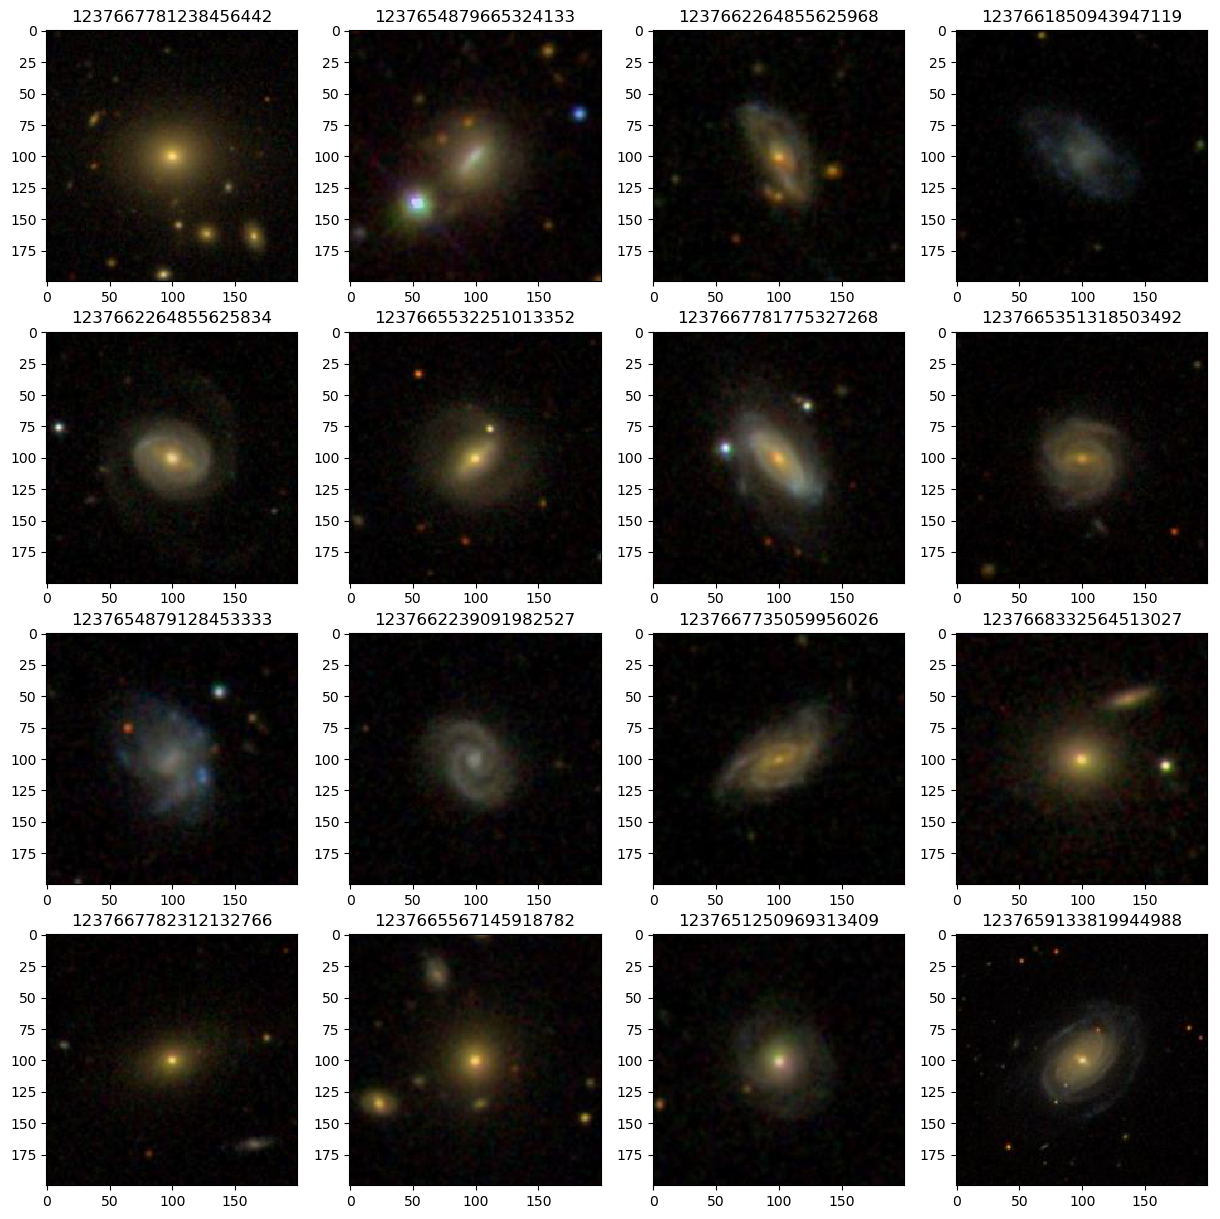

In [11]:
# set thumbnail parameters
width=200           # image width
height=200          # height
pixelsize=0.396     # image scale
plt.figure(figsize=(15, 15))   # display in a 4x4 grid
subPlotNum = 1

i = 0
nGalaxies = len(gals)
for index,gal in gals.iterrows():           # iterate through rows in the DataFrame
    i = i + 1
    if i<17:
        print('Getting image '+str(i)+' of '+str(nGalaxies)+'...')
        if (i == nGalaxies):
            print('Plotting images...')
        scale=2*gal['petror90_r']/pixelsize/width
        img= SciServer.SkyServer.getJpegImgCutout(ra=gal['ra'], dec=gal['dec'], width=width, height=height, scale=scale,dataRelease='DR13')
        plt.subplot(4,4,subPlotNum)
        subPlotNum += 1
        plt.imshow(img)                               # show images in grid
        plt.title(index)                              # show the object identifier (objId) above the image.

#### YOUR TURN: 

**Edit the original query (from above) to retrieve and display a set of small, red galaxies**.  Recall that "color" can be defined as the difference between any two magnitudes measured in different filters (e.g., g-r, i-z, etc.,), and angular size can be approximated using the radius enclosing 90 percent of an object's light ('p.petror90_r').

It may be helpful to review the descriptions of the [five SDSS filters](http://classic.sdss.org/dr7/instruments/imager/#filters), and [what magnitudes mean](https://en.wikipedia.org/wiki/Magnitude_(astronomy)) in astronomy.

In [12]:
# your code here

## IV. Visualizing Returned Data
Now that we have run the query and stored the results, we can start analyzing the results.

Start by making a simple plot of positions, using the query from the last step.


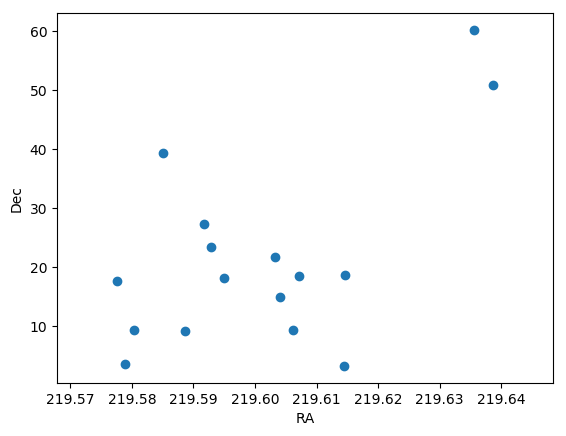

In [13]:
# Try making an Ra, Dec scatter plot...
plt.scatter(gals['ra'], gals['dec'])
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show() 

#### YOUR TURN: 

The figure you just made visualizes your data in the simplets possible way: as a scatterplot of (ra/dec) positions with default graphing parameters. But you could make many other possible graphs, and you can always add labels, change axis scales, or adjust many other features of graphs. You practiced making some of these display changes in the sections above. Full details on all the possible graph options are described in the online documentation for the pyplot module at http://matplotlib.org/api/pyplot_summary.html.

Now let's grab some different data and make a useful plot.

**In the code block below, write a SQL query that returns magnitude information for 1,000 galaxies between redshifts 0.2 and 0.3.**

Hints: 

#1: Recall that a galaxy's **redshift** is deterimined by taking a spectrum and measuring the shift of identified emission and absorption lines.  So this is information that's provided in the [SpecObj](http://skyserver.sdss.org/dr15/en/help/browser/browser.aspx#&&history=description+SpecObj+V) table, not the "galaxy" table, which contains only photometric (i.e., imaging) information.

#2: If your query times out, you may be asking for the impossible... are your magnitude, redshift, and size limits all compatible with a sample of real galaxies?  Keep modifying the query until you are able to retrieve 1000 galaxies in the redshift range 0.2<z<0.3

In [14]:
# your code here

**Now, use your returned galaxy data to generate a color-magnitude diagram (g vs. g-r) in the cell below.**

In [ ]:
# your code here

### Interpreting your plot:

As we will discuss in more detail in coming weeks, galaxies in the modern universe (redshifts z<0.5) generally group into two general areas of the color-magnitude diagram (["the red sequence" and the "blue cloud"](https://en.wikipedia.org/wiki/Galaxy_color%E2%80%93magnitude_diagram)).  

Do you see two distinct populations in your plot?  If not, does anything change if you try refining the signal to noise of your data (i.e., requiring a minimum ratio of g / err_g)? What about if you require a narrower slice in redshift?

Reminder: as described in the [SDSS schema of the "galaxy" table](http://cas.sdss.org/dr15/en/help/browser/browser.aspx#&&history=description+Galaxy+V), the uncertainty on each magnitude is also available and can be fetched in the SQL query. 

In [ ]:
# show your work (and comments!) here